In [28]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import pearsonr, spearmanr

import wrangle_zillow
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
zillow = pd.read_csv('zillow.csv')

In [3]:
zillow = zillow.drop(columns='Unnamed: 0')

In [4]:
zillow.to_csv('zillow.csv')

In [5]:
zillow

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
...,...,...,...,...,...,...,...
2152859,4.0,3.0,2262.0,960756.0,2015.0,13494.52,6059.0
2152860,4.0,4.5,3127.0,536061.0,2014.0,6244.16,6059.0
2152861,0.0,0.0,NaN,208057.0,NaN,5783.88,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


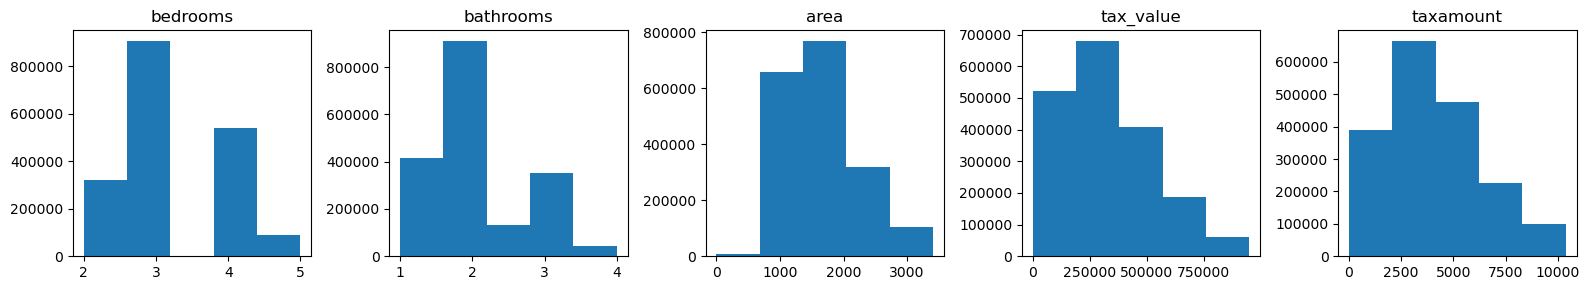

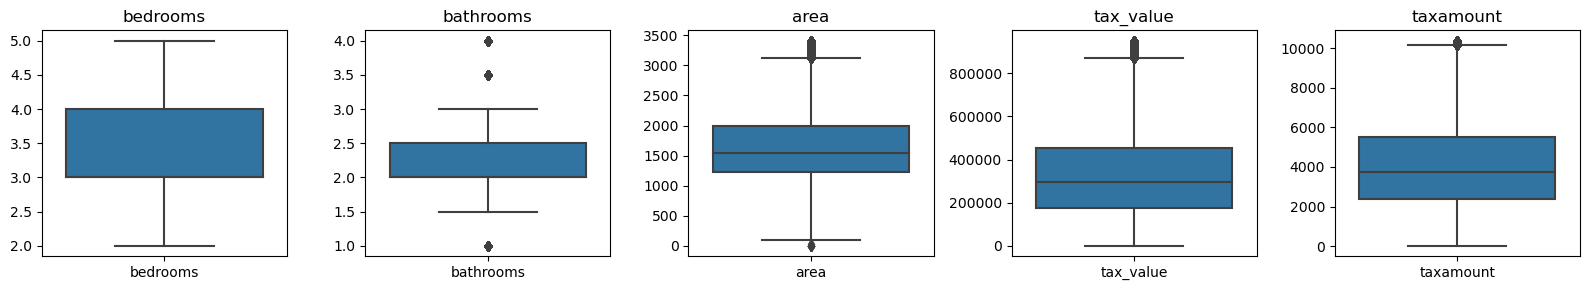

In [6]:
train, validate, test = wrangle_zillow.prepare_zillow(zillow)
trainsamp1 = train.sample(1000,random_state=12)

In [7]:
trainsamp1['age'] = 2023-trainsamp1['year_built']

In [8]:
trainsamp1

,bedrooms,bathrooms,area,tax_value,year_built,taxamount,fips,age
1158290,3.0,2.0,1612.0,518016.0,1955.0,6567.84,6037.0,68.0
644231,4.0,2.0,1805.0,573616.0,1972.0,6843.24,6059.0,51.0
1459488,2.0,1.0,1218.0,182417.0,1951.0,2680.17,6037.0,72.0
2149989,3.0,2.5,1885.0,358469.0,1965.0,4410.72,6059.0,58.0
185697,3.0,2.0,1477.0,229000.0,1994.0,3575.09,6037.0,29.0
...,...,...,...,...,...,...,...,...
1971825,5.0,3.0,2712.0,785000.0,1997.0,9514.44,6037.0,26.0
337324,3.0,2.0,1230.0,32666.0,1917.0,997.65,6037.0,106.0
796028,4.0,3.0,2259.0,400005.0,1994.0,3962.52,6059.0,29.0
674210,3.0,1.0,1038.0,201361.0,1954.0,2759.19,6037.0,69.0


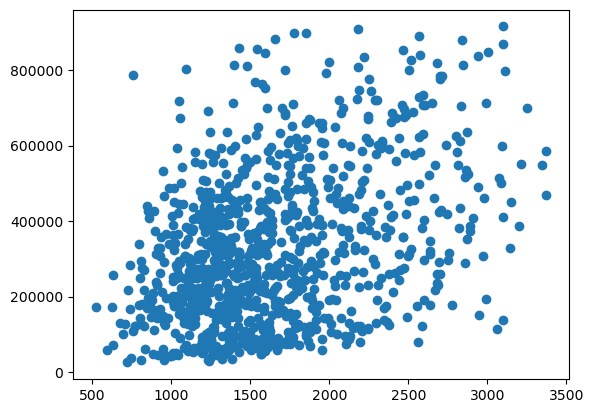

In [9]:
plt.scatter(trainsamp1.area,trainsamp1.tax_value)
plt.show()

In [48]:
lr1 = LinearRegression()
lr1.fit(trainsamp1[['area']],trainsamp1[['tax_value']])
model = lr1.predict(trainsamp1[['area']])

In [33]:
trainsamp1.area

1158290    1612.0
644231     1805.0
1459488    1218.0
2149989    1885.0
185697     1477.0
            ...  
1971825    2712.0
337324     1230.0
796028     2259.0
674210     1038.0
1042373    2708.0
Name: area, Length: 1000, dtype: float64

In [34]:
trainsamp1[['area']]

,area
1158290,1612.0
644231,1805.0
1459488,1218.0
2149989,1885.0
185697,1477.0
...,...
1971825,2712.0
337324,1230.0
796028,2259.0
674210,1038.0


In [34]:
#resdiuals and baselines into df
trainsamp1['baseline'] = trainsamp1['tax_value'].mean()
trainsamp1['lr1_model_preds'] = lr1.predict(trainsamp1[['area']])
trainsamp1['residual'] = trainsamp1['lr1_model_preds'] - trainsamp1['tax_value']
trainsamp1['baseline_residual'] = trainsamp1['baseline'] - trainsamp1['tax_value']
trainsamp1['baseline_residual_2'] = trainsamp1.baseline_residual**2
trainsamp1['residual_2']= trainsamp1.residual**2

In [38]:
#get rid of everything we don't need
trainsamp1.drop(columns=['bedrooms', 'bathrooms', 'year_built','fips'], inplace=True)

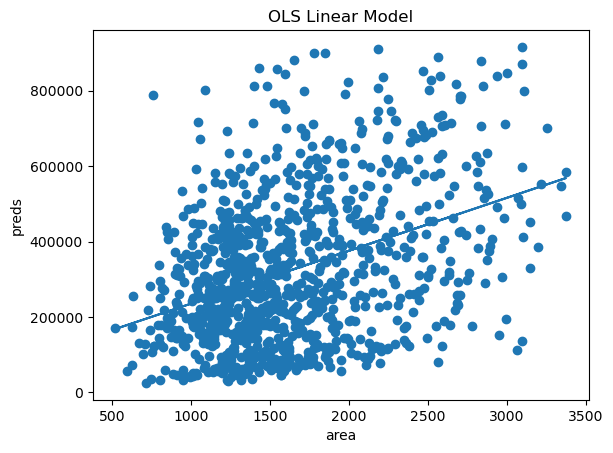

In [23]:
#plot OLS
plt.scatter(trainsamp1.area,trainsamp1.tax_value)
plt.plot(trainsamp1.area, trainsamp1.lr1_model_preds)
plt.xlabel('area')
plt.ylabel('preds')
plt.title('OLS Linear Model')
plt.show()

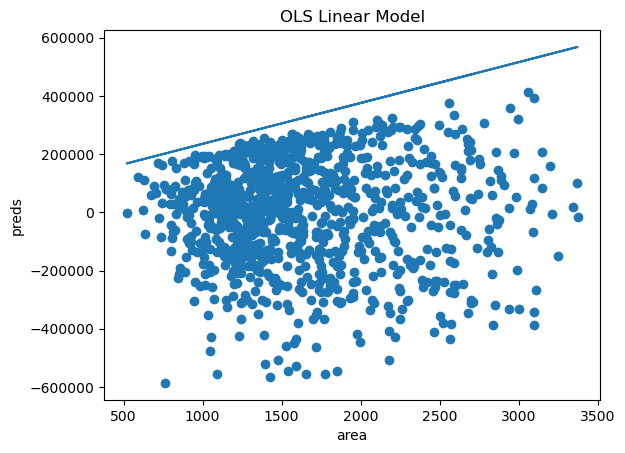

In [27]:
#plot residuals
plt.scatter(trainsamp1.area,trainsamp1.residual)
plt.plot(trainsamp1.area, trainsamp1.lr1_model_preds)
plt.xlabel('area')
plt.ylabel('preds')
plt.title('OLS Linear Model')
plt.show()

In [31]:
#mean squared error
MSE2_baseline = mean_squared_error(trainsamp1.tax_value, trainsamp1.baseline)
MSE2 = mean_squared_error(trainsamp1.tax_value, trainsamp1.lr1_model_preds)
print(f"MSE baseline: {MSE2_baseline: .8f}") 
print(f"MSE: {MSE2:.8f}") 

MSE baseline:  39069920130.03591919
MSE: 33112200663.88751602


In [32]:
#Sum of squared erros
SSE2_baseline = MSE2_baseline * len(trainsamp1)
SSE2 = MSE2 * len(trainsamp1)
print(f"SSE baseline: {SSE2_baseline: .8f}") 
print(f"SSE: {SSE2: .8f}") 

SSE baseline:  39069920130035.92187500
SSE:  33112200663887.51562500


In [33]:
#RMSE
RMSE_baseline = mean_squared_error(trainsamp1.tax_value, trainsamp1.baseline,squared=False)
RMSE = mean_squared_error(trainsamp1.tax_value, trainsamp1.lr1_model_preds,squared=False)
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE baseline =  197661.1
RMSE =  181967.6


In [40]:
SSE_baseline = trainsamp1.baseline_residual_2.sum()
SSE = trainsamp1.residual_2.sum()
print(f"SSE Baseline = {SSE_baseline: .1f}")
print(f"SSE = {SSE:.1f}")

SSE Baseline =  39069920130035.9
SSE = 33112200663887.5


In [41]:
#TSS
TSS = SSE_baseline
TSS

39069920130035.92

In [43]:
#ESS
ESS = TSS - SSE
ESS

5957719466148.406

In [45]:
ESS/TSS

0.1524886523012948

In [44]:
#r2
r2_score(trainsamp1.tax_value,trainsamp1.lr1_model_preds)

0.15248865230129482

In [57]:
def plot_residuals(model, X, y):
    """
    Takes a fitted regression model, the predictor variables X, and the response variable y,
    and plots the residuals of the regression.
    """
    # Get predicted values from the model
    y_pred = model.predict(X)

    # Compute residuals
    residuals = y - y_pred

    # Plot residuals vs. predicted values
    plt.scatter(y_pred, residuals, color='blue')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

In [59]:
def regression_errors(y, yhat):
    """
    Calculates regression errors and returns the following values:
    sum of squared errors (SSE)
    explained sum of squares (ESS)
    total sum of squares (TSS)
    mean squared error (MSE)
    root mean squared error (RMSE)
    """
    # Calculate SSE, ESS, and TSS
    SSE = np.sum((y - yhat) ** 2)
    ESS = np.sum((yhat - np.mean(y)) ** 2)
    TSS = SSE + ESS

    # Calculate MSE and RMSE
    n = len(y)
    MSE = SSE / n
    RMSE = np.sqrt(MSE)

    return SSE, ESS, TSS, MSE, RMSE

In [61]:
SSE, ESS, TSS, MSE, RMSE = regression_errors(trainsamp1.tax_value, trainsamp1.lr1_model_preds)

In [62]:
# Print results
print(f"SSE: {SSE}")
print(f"ESS: {ESS}")
print(f"TSS: {TSS}")
print(f"MSE: {MSE}")
print(f"RMSE: {RMSE}")

SSE: 33112200663887.516
ESS: 5957719466148.402
TSS: 39069920130035.92
MSE: 33112200663.887516
RMSE: 181967.58135417284


In [63]:
def baseline_mean_errors(y):
    """
    Calculates the errors for the baseline model and returns the following values:
    sum of squared errors (SSE)
    mean squared error (MSE)
    root mean squared error (RMSE)
    """
    # Calculate baseline prediction
    y_mean = np.mean(y)
    yhat_baseline = np.full_like(y, y_mean)

    # Calculate SSE, MSE, and RMSE
    SSE_bl = np.sum((y - yhat_baseline) ** 2)
    n = len(y)
    MSE_bl = SSE / n
    RMSE_bl = np.sqrt(MSE)

    return SSE_bl, MSE_bl, RMSE_bl

In [64]:
# Calculate errors for baseline model
SSE_bl, MSE_bl, RMSE_bl = baseline_mean_errors(trainsamp1.tax_value)

# Print results
print(f"SSE: {SSE_bl}")
print(f"MSE: {MSE_bl}")
print(f"RMSE: {RMSE_bl}")


SSE: 39069920130035.92
MSE: 33112200663.887516
RMSE: 181967.58135417284


In [65]:
def better_than_baseline(y, yhat):
    """
    Checks if your model performs better than the baseline and returns a boolean value.
    """
    # Calculate errors for model and baseline
    SSE_model = np.sum((y - yhat) ** 2)
    SSE_baseline = np.sum((y - np.mean(y)) ** 2)

    # Check if model SSE is less than baseline SSE
    if SSE_model < SSE_baseline:
        return True
    else:
        return False

In [66]:
better_than_baseline(trainsamp1.tax_value,trainsamp1.lr1_model_preds)

True

In [67]:
def plot_residuals(y, yhat):
    """
    Creates a residual plot using matplotlib.
    """
    # Calculate residuals
    residuals = y - yhat

    # Create residual plot
    plt.scatter(yhat, residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

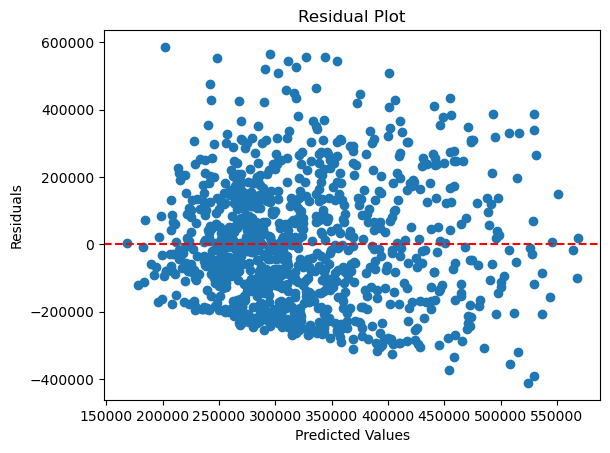

In [68]:
plot_residuals(trainsamp1.tax_value,trainsamp1.lr1_model_preds)